In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
import os
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [2]:
# Importing the dataset
dt = pd.read_excel('LUAD_clinical.xlsx',index_col=0)

In [3]:
dt.shape

(517, 347)

In [4]:
dt.head(2)

,Diagnosis Age,Birth from Initial Pathologic Diagnosis Date,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,Fraction Genome Altered,Year Cancer Initial Diagnosis,Longest Dimension,Number of Samples Per Patient,Sample type id,Shortest Dimension,Specimen Second Longest Dimension,...,Tissue Source Site_NJ,Tissue Source Site_O1,Tissue Source Site_S2,Person Neoplasm Status_TUMOR FREE,Person Neoplasm Status_WITH TUMOR,Vial number_A,Vial number_B,Patient's Vital Status_Alive,Patient's Vital Status_Dead,Overall Survival (Months)2
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,70.0,-25752.0,0,0.456523,2009.0,1.1,1,1,0.3,0.9,...,0,0,0,1,0,1,0,1,0,0.00
TCGA-05-4249-01,67.0,-24532.0,0,0.222128,2007.0,1.4,1,1,0.4,0.8,...,0,0,0,1,0,1,0,1,0,50.03


In [5]:
del dt['Patient\'s Vital Status_Dead']
del dt['Patient\'s Vital Status_Alive']

In [6]:
dt.shape

(517, 345)

In [7]:
X = dt.iloc[:,0:344].values
y = dt.iloc[:, -1].values

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.fit_transform(X_val)

In [10]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [11]:
#Create Deep Neural Network Architecuture
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               44160     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 209,025
Trainable params: 209,025
Non-trainable params: 0
_________________________________________________________________


In [12]:
NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2)

Train on 264 samples, validate on 66 samples
Epoch 1/100
264/264 [==============================] - 0s 990us/sample - loss: 0.6815 - mean_absolute_error: 0.6815 - val_loss: 0.4396 - val_mean_absolute_error: 0.4396
Epoch 2/100
264/264 [==============================] - 0s 103us/sample - loss: 0.6006 - mean_absolute_error: 0.6006 - val_loss: 0.4187 - val_mean_absolute_error: 0.4187
Epoch 3/100
264/264 [==============================] - 0s 107us/sample - loss: 0.5040 - mean_absolute_error: 0.5040 - val_loss: 0.4133 - val_mean_absolute_error: 0.4133
Epoch 4/100
264/264 [==============================] - 0s 110us/sample - loss: 0.4096 - mean_absolute_error: 0.4096 - val_loss: 0.4170 - val_mean_absolute_error: 0.4170
Epoch 5/100
264/264 [==============================] - 0s 108us/sample - loss: 0.3526 - mean_absolute_error: 0.3526 - val_loss: 0.4238 - val_mean_absolute_error: 0.4238
Epoch 6/100
264/264 [==============================] - 0s 104us/sample - loss: 0.2884 - mean_absolute_error: 0

264/264 [==============================] - 0s 107us/sample - loss: 0.0646 - mean_absolute_error: 0.0646 - val_loss: 0.4432 - val_mean_absolute_error: 0.4432
Epoch 50/100
264/264 [==============================] - 0s 92us/sample - loss: 0.0919 - mean_absolute_error: 0.0919 - val_loss: 0.4663 - val_mean_absolute_error: 0.4663
Epoch 51/100
264/264 [==============================] - 0s 109us/sample - loss: 0.0847 - mean_absolute_error: 0.0847 - val_loss: 0.4368 - val_mean_absolute_error: 0.4368
Epoch 52/100
264/264 [==============================] - 0s 98us/sample - loss: 0.0824 - mean_absolute_error: 0.0824 - val_loss: 0.4871 - val_mean_absolute_error: 0.4871
Epoch 53/100
264/264 [==============================] - 0s 99us/sample - loss: 0.0695 - mean_absolute_error: 0.0695 - val_loss: 0.4526 - val_mean_absolute_error: 0.4526
Epoch 54/100
264/264 [==============================] - 0s 103us/sample - loss: 0.0689 - mean_absolute_error: 0.0689 - val_loss: 0.4675 - val_mean_absolute_error: 0.4

264/264 [==============================] - 0s 97us/sample - loss: 0.0545 - mean_absolute_error: 0.0545 - val_loss: 0.4812 - val_mean_absolute_error: 0.4812
Epoch 98/100
264/264 [==============================] - 0s 96us/sample - loss: 0.0595 - mean_absolute_error: 0.0595 - val_loss: 0.4370 - val_mean_absolute_error: 0.4370
Epoch 99/100
264/264 [==============================] - 0s 92us/sample - loss: 0.0590 - mean_absolute_error: 0.0590 - val_loss: 0.4542 - val_mean_absolute_error: 0.4542
Epoch 100/100
264/264 [==============================] - 0s 103us/sample - loss: 0.0525 - mean_absolute_error: 0.0525 - val_loss: 0.4637 - val_mean_absolute_error: 0.4637


In [13]:
#Predicting the Validation set results
y_predval = NN_model.predict(X_val)

In [14]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.5098261024488672
0.4656565912347609
0.6823903510709695
R2 Score
0.346842798477657


R^2 = 0.3468


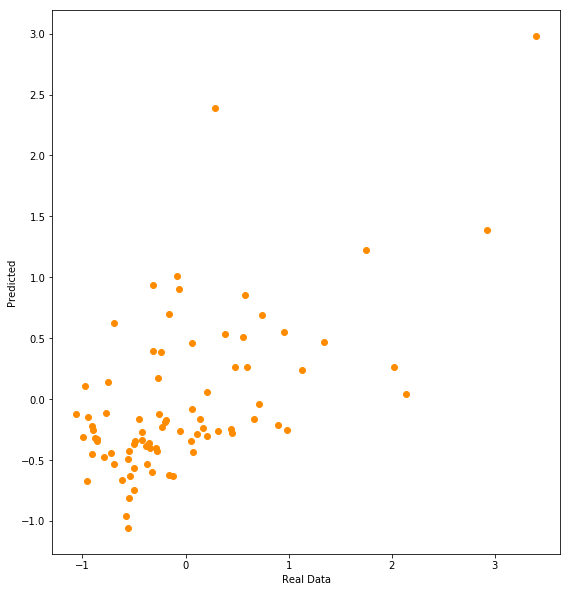

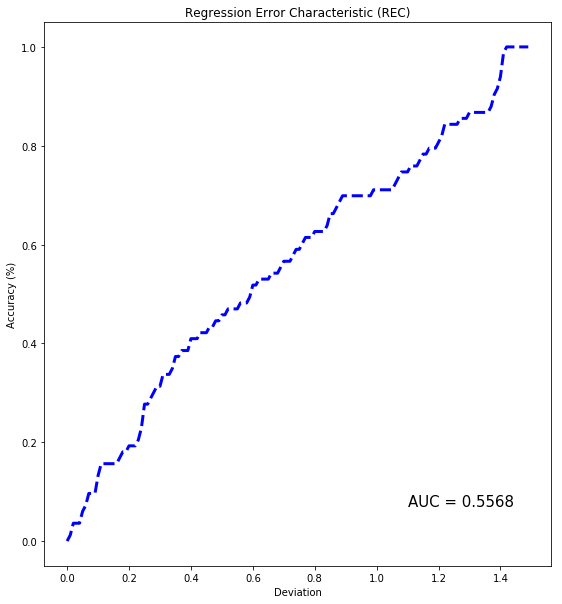

In [16]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()